In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
import numpy as np
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [4]:

def extract_hog_features(image):
    gray_image = color.rgb2gray(image)

    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled


In [5]:
import os
from skimage import io
import matplotlib.pyplot as plt

folder_names=['Pepper__bell___Bacterial_spot','Potato___Early_blight']
dataset_path = r'C:\Users\ASM TECH\Desktop\MachineLearing_Project\Extracted_Data_Set\Rest_Of_Data'

class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir() and os.path.basename(f.path) in folder_names]
features_list = []
labels_list = []

for class_folder in class_folders:
    class_name = os.path.basename(class_folder)

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        image = io.imread(image_path)

        hog_features, hog_image = extract_hog_features(image)

        # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3, 3), sharex=True, sharey=True)
        # ax1.axis('off')
        # ax1.imshow(image, cmap=plt.cm.gray)
        # ax2.axis('off')
        # ax2.imshow(hog_image, cmap=plt.cm.gray)
        # plt.show()

        features_list.append(hog_features)

        labels_list.append(class_name)


In [6]:
features_array = np.array(features_list)
labels_array = np.array(labels_list)
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels_array)
print(features_array.shape)
print(numeric_labels.shape)


(1997, 72900)
(1997,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features_array, numeric_labels, test_size=0.2, random_state=42,stratify=numeric_labels)


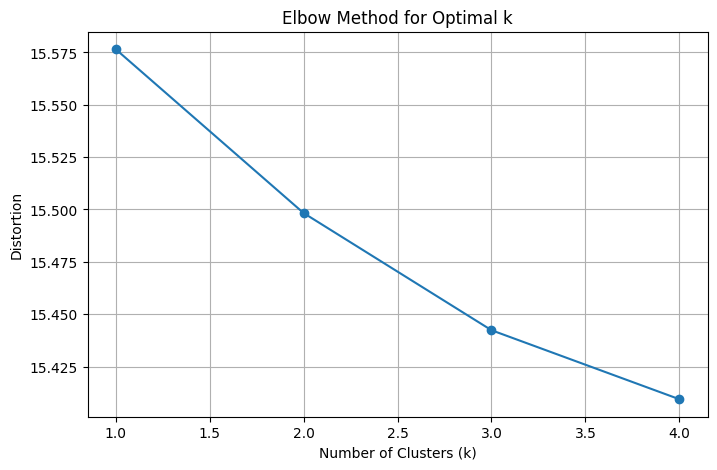

In [14]:
import numpy as np
from scipy.cluster.vq import kmeans, vq

max_k = 4
distortions = []  

for k in range(1, max_k + 1):
    centroids, distortion = kmeans(X_train, k)
    distortions.append(distortion)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [12]:


num_clusters = 2  

centroids, distortion = kmeans(X_train, num_clusters)

cluster_indices, _ = vq(X_train, centroids)

print(cluster_indices)


[0 1 0 ... 1 1 1]


In [13]:
accurecy=accuracy_score(y_train,cluster_indices)
accurecy


0.5911083281152161

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression()

param_grid={
'C':[.001,.01,.1,1]
}

grid_search=GridSearchCV(logistic_model,param_grid,scoring='accuracy')
grid_search.fit(X_train, y_train)



C:\Users\ASM TECH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASM TECH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, scoring='accuracy')

In [16]:
model=grid_search.best_estimator_
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy * 100, '%')

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 92.5 %
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       200
           1       0.90      0.95      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400



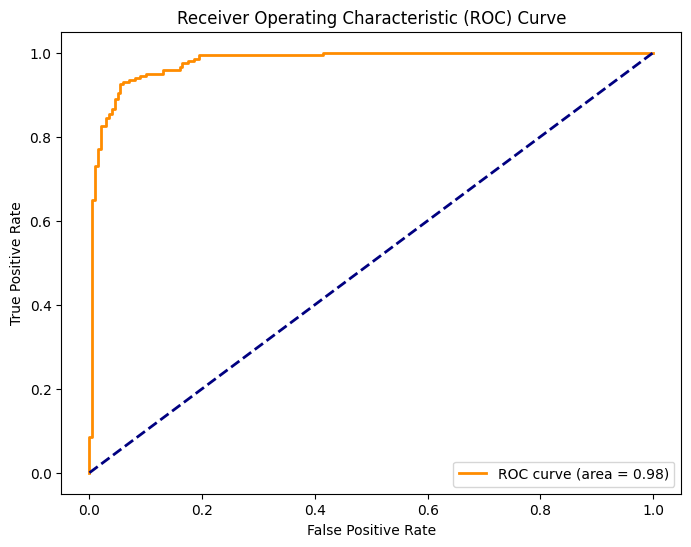

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


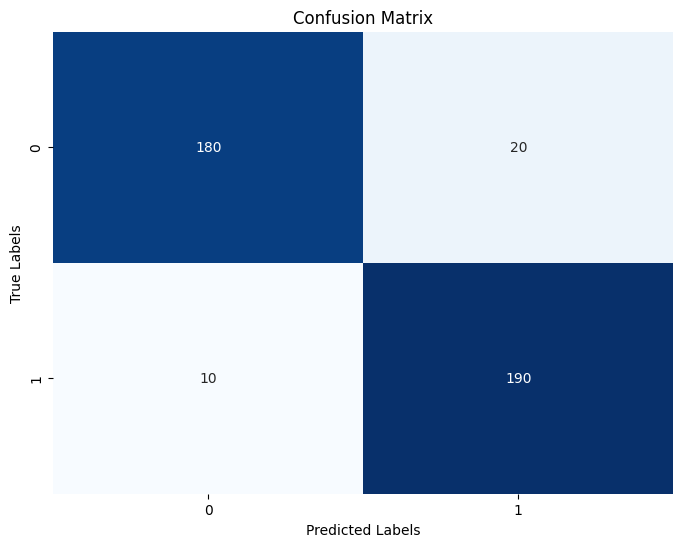

In [25]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()